In [1]:
import numpy as np
import pandas as pd
import glob
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table
import itertools
from astroquery.simbad import Simbad
from utils import PLOT_PARAMS
from astropy import constants as const
from matplotlib import colors
PLOT_PARAMS()
import thejoker as tj
import random
random.seed(42) 


from datetime import date
today=date.today()
DATE =today.strftime("%m_%d_%y")
print(DATE)
import pickle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

plt.rcParams['figure.facecolor'] = 'white'
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

vlt = EarthLocation.of_site('paranal')  # the easiest way... but requires internet

09_16_25


In [2]:
galah_vac = Table.read('../../lithium/data/GALAH_DR3_VAC_ages_v2.fits').to_pandas()


In [3]:
rv_df = pd.read_csv('rv_df.csv')

In [4]:
comb_df = pd.read_csv('combined_rvs.csv')


In [5]:
binary_list_113 = [9, 11, 16, 18, 19, 23,] # old: 1, 4, 5, 7, 9, 11, 16, 18, 19, 21, 23  
binary_list_112 = [6, 7, 23] #old: 5, 6, 7, 23 #13 removed because of dipper star

In [88]:
# comb_df

,GALAH_ID,time,rv,rv_err,source
0,140311007101261,2.460388e+06,23.529642,0.049732,ESPRESSO
1,140311007101261,2.460304e+06,23.306115,0.018870,ESPRESSO
2,140311007101261,2.460345e+06,23.235479,0.051679,ESPRESSO
3,140311007101261,2.456728e+06,23.688000,0.082000,GALAH
4,140707003101315,2.458733e+06,-44.766225,0.055473,APOGEE
...,...,...,...,...,...
193,171003002601363,2.460468e+06,-33.599749,0.032692,ESPRESSO
194,171003002601363,2.460501e+06,-33.708185,0.049214,ESPRESSO
195,171003002601363,2.460444e+06,-33.557647,0.032975,ESPRESSO
196,171003002601363,2.460428e+06,-33.528471,0.040166,ESPRESSO


In [156]:
def func1(logg):
    a, b = -0.60, 3.31
    log_v = a*logg+b
    return 10.**log_v
    
def func2(logg):
    siga, sigb = 0.04, 0.10
    a, b = -0.60, 3.31
    a = a+3.5*siga
    b = b+3.5*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
def func3(logg):
    siga, sigb = -0.04, -0.10
    a, b = -0.60, 3.31
    a = a+3.5*siga
    b = b+3.5*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
def func_2sigma(logg):
    siga, sigb = 0.04, 0.10
    a, b = -0.60, 3.31
    a = a+2*siga
    b = b+2*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
def func4(logg):
    siga, sigb = 0.04, 0.10
    a, b = -0.60, 3.31
    a = a+1.5*siga
    b = b+1.5*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
                

In [129]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors



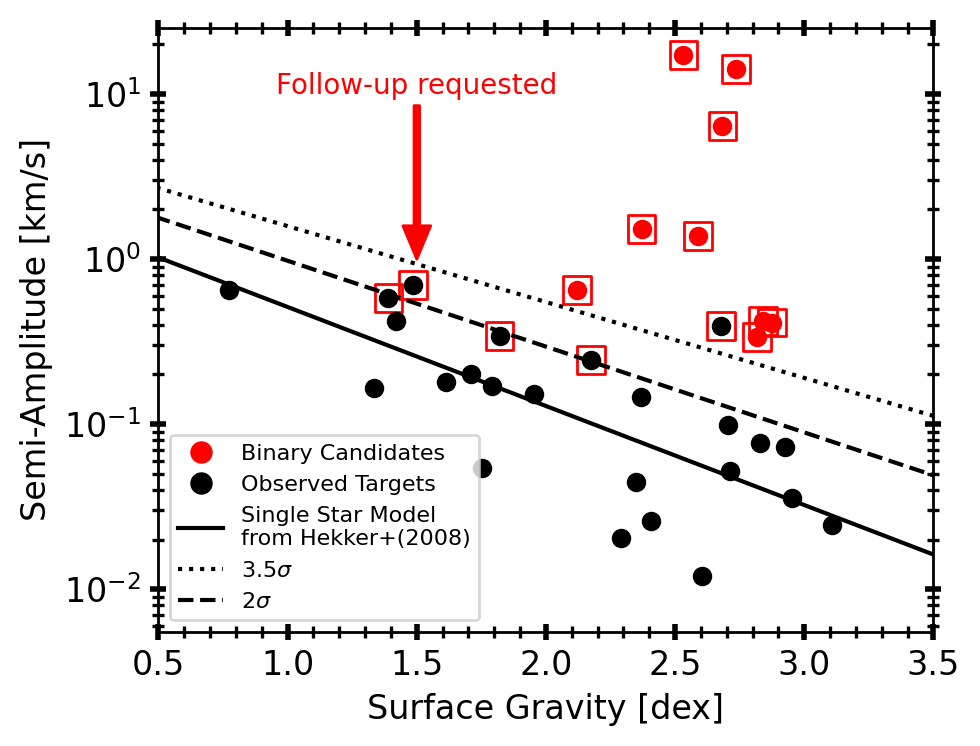

In [187]:
PLOT_PARAMS(LS=12, SIZE=12)
def make_semiK_plot():
    plt.figure(figsize=(5,4),dpi=200)
    ax=plt.subplot(111)
    for i, row in rv_df.iterrows():
        _, rv, _, _, _ = clean_up(rv_df[(rv_df.RG_id==row.RG_id) & (rv_df.program==row.program)],source='ESPRESSO')
        semiK = (max(rv) - min(rv))/2.
        
        if row.program==112:
            if row.RG_id in binary_list_112:
                plt.scatter(row.logg, semiK,c='r')
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
            elif semiK > (func4(row.logg)/1000.) :#and row.logg<2.:
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
                plt.scatter(row.logg, semiK,c='k')

            else:
                plt.scatter(row.logg, semiK,c='k')
        if row.program==113:
            if row.RG_id in binary_list_113:
                plt.scatter(row.logg, semiK,c='r')
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
            elif semiK > (func4(row.logg)/1000.) :#and row.logg<2.:
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
                plt.scatter(row.logg, semiK,c='k')
            else:
                plt.scatter(row.logg, semiK,c='k')
                
#       
    
    x = np.linspace(0.,4, 100)
    y1 = func1(x)/1000.
    y2 = func2(x)/1000.
    y3 = func3(x)/1000.
    y4 = func_2sigma(x)/1000.
    plt.plot(x,y1, c='k')
    plt.plot(x,y2, c='k',ls='dotted',label=r'3.5$\sigma$')
    plt.plot(x,y4, c='k',ls='dashed')
    plt.legend()
    plt.xlim(0.5,3.5)
#     plt.axvspan(2.0,3.0, color='green',alpha=0.2,zorder=0)
    plt.yscale('log')
    plt.xlabel('Surface Gravity [dex]')
    plt.ylabel('Semi-Amplitude [km/s]')
    
    plt.annotate('Follow-up requested',  # The text to display
                xy=(1.5, 1),  # The point the arrow points to (x, y coordinates)
                xytext=(1.5, 10),  # The position of the text (x, y coordinates)
                arrowprops=dict(color='r', width=2.,headwidth=10),  # Properties of the arrow
                fontsize=10,
                color='r',ha='center'
            )
    
    lgnd = [Line2D([0], [0], marker='o', mec='r',mfc='r',ms=np.sqrt(50),ls='',label='Binary Candidates'), 
            Line2D([0], [0], marker='o', mec='k',mfc='k',ms=np.sqrt(50),ls='',label='Observed Targets'), 
#             Line2D([0], [0], marker='s', mec='r',mfc='None',ms=np.sqrt(100),ls='',label='Follow-up Requested'), 
            Line2D([0], [0], mec='k',c='k',ls='solid',label='Single Star Model\nfrom Hekker+(2008)'),
            Line2D([0], [0], c='k',ls='dotted',label='3.5$\sigma$'),
            Line2D([0], [0], c='k',ls='dashed',label='2$\sigma$')
           ]
    ax.legend(handles=lgnd,fontsize=8)

#     ,label='',,label=''
make_semiK_plot()
# plt.savefig('../p117_plot.png',bbox_inches='tight',dpi=200)

In [7]:
def clean_up(df,source):
    galah_id = df.sobject_id.values[0]
    dtemp    = comb_df[(comb_df.GALAH_ID==galah_id) & (comb_df.source==source)]

    time = dtemp['time'].to_numpy()
    rv   = dtemp['rv'].to_numpy()
    err  = dtemp['rv_err'].to_numpy()
    source  = dtemp['source'].to_numpy()
    
    
    return time, rv, err, source, dtemp

x = clean_up(rv_df[(rv_df.RG_id==1) & (rv_df.program==112)],source='ESPRESSO')


In [8]:
from scipy.optimize import newton

In [9]:
from astropy.coordinates import EarthLocation

# Example: Observer at Mauna Kea Observatory
vlt_location = EarthLocation.of_site('paranal')  # the easiest way... but requires internet

location = EarthLocation.from_geodetic(lon=vlt_location.lon, lat=vlt_location.lat, height=vlt_location.height)


In [10]:
from astropy.time import Time
from datetime import datetime

# Example datetime object
p117_start = datetime(2026, 5, 1, 12, 0, 0)
p117_end   = datetime(2027, 4, 30, 12, 0, 0)

# Convert to astropy Time object, specifying the scale (e.g., UTC)
tstart = Time(p117_start, scale='utc')
tend   = Time(p117_end, scale='utc')

tstart = Time(p117_start, scale='utc', location=location)
tend   = Time(p117_end, scale='utc', location=location)

# 4. Calculate the Barycentric Julian Date (BJD)
# bjd = t.bjd
print(tstart.mjd)
print(tend.mjd)

# Calculate BJD, specifying the observer's location
# bjd_start = tstart.light_travel_time(location).jd  # This calculates BJD_TDB
# bjd_end   = tend.light_travel_time(location).jd  # This calculates BJD_TDB

61161.5
61525.5


In [11]:
dftemp  = rv_df[(rv_df.RG_id==23) & (rv_df.program==112)]

# galah_vac[galah_vac.sobject_id==170514002101318].m_act_bstep


In [15]:
def convert_mjd_to_jd(mjd):
    t = Time(mjd, format='mjd', scale='local')
    return t.mjd

version = 1

In [33]:
p117_start_mjd = 61161.5
p117_end_mjd   = 61525.5


In [49]:
# self.tbl["omega"][mask] % (2 * np.pi * u.rad)
(-0.9145332767299043  + np.pi) % (2 * np.pi ) #-13.862566902939578

# omega = omega + np.pi

2.2270593768598888

here
-1.090760272968166 9.213850373061401
-1.090760272968166 9.213850373061401 -0.34719977834229737
10000
10000
-0.9145332767299043 -13.862566902939578
2.2270593768598888 13.862566902939578 0.708895016772815
10000
10000


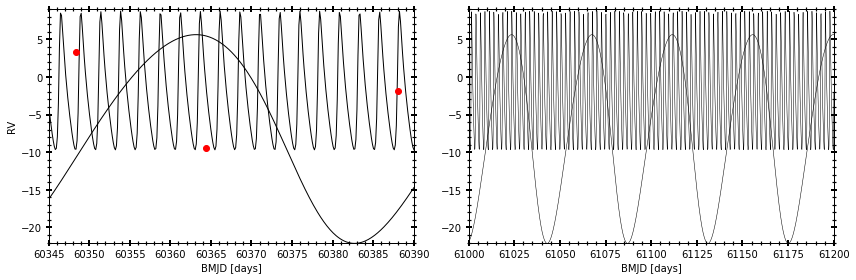

In [197]:
PLOT_PARAMS(SIZE=10,LS=10)
def kepler_eq(E, M, e):
    return E - e * np.sin(E) - M

def get_vr(time_grid, t0, K, omega, M0, P, e, v0):
    # omega: argument of periastron (rad)
    
    # Compute RV curve
    vr = []
    
    # use first time step to find phi0
    
    phi0 = 2*np.pi*t0/P - M0
    
    for i,ti in enumerate(time_grid):
        if i == 0:
            E = newton(kepler_eq, M0, args=(M0, e))
            nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                                np.sqrt(1 - e) * np.cos(E / 2))
            v = K * (np.cos(nu + omega) + e * np.cos(omega))

        else:
            M = 2 * np.pi * ti / P - phi0
            E = newton(kepler_eq, M, args=(M, e))
            nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                                np.sqrt(1 - e) * np.cos(E / 2))
            v = K * (np.cos(nu + omega) + e * np.cos(omega))
        vr.append(v)

    vr_kms = np.array(vr)
    vr     = vr_kms  + v0
    
    return vr


# target_time = [60348.37299403 ,60364.38254112, 60388.0047957]
# target_rv   = [3.32658486, -9.46735817, -1.86912108]


def plot_one_star(program, obj, time=False, rv=False, N=1, ylim=False,xlim=False):
    
    if time is False:
        target_time, target_rv, _, _, _ = clean_up(rv_df[(rv_df.RG_id==obj) & (rv_df.program==program)], source='ESPRESSO')
        t = Time(target_time, format="jd", scale="tcb")
        target_time = t.mjd
        print('here')
    else:
        target_time=time
        target_rv = rv
    
    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    
    fig = plt.figure(figsize=(12,4))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
#     ax3 = plt.subplot(133)
    ax1.scatter(target_time, target_rv, c='r',zorder=100)
    
    t0 = np.sort(target_time)[0]
    time_grid = np.linspace(min(target_time)-100, p117_end_mjd, 10000)
    #time_grid = target_time*1
    
    for n in range(N):
        sample = joker_samples[n]
        P, e, omega, M0, K, v0 = sample['P'][0], sample['e'][0], sample['omega'][0], sample['M0'][0], sample['K'][0], sample['v0'][0]
        P, e, omega, M0, K, v0 = P.value, e.value, omega.value, M0.value, K.value, v0.value
        print(omega, K)
        if K < 0:
            K = np.abs(K)
            omega = omega + np.pi 
            omega = omega % (2 * np.pi )
            
#         omega += 3*np.pi/2.
        print(omega, K, omega/np.pi)
        print(len(time_grid))
        out_vr    = get_vr(time_grid, t0, K=K, omega=omega, M0=M0, P=P, e=e, v0=v0)
        # plotting
        print(len(out_vr))
        ax1.plot(time_grid, out_vr, lw=1, c='k')#,alpha=0.5)
        ax2.plot(time_grid, out_vr, lw=0.5, c='k')
#         ax3.plot(time_grid, out_vr, lw=0.5)

    ax1.set_xlim(min(target_time)-2,max(target_time)+2)
    
    ax2.set_xlim(61000,61200)

    plt.tight_layout()
    ax1.set_ylabel('RV')

    for ax in [ax1,ax2]:
        ax.set_xlabel('BMJD [days]')
        
    if ylim:
        ax1.set_ylim(ylim)
        ax2.set_ylim(ylim)
    if xlim:
        ax1.set_xlim(xlim)
    
plot_one_star(112, 23, N=2, ylim=(-22,9), xlim=(60345, 60390))  

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.savefig('../p117_plot_2.png',bbox_inches='tight',dpi=200)
plt.show()



In [73]:
np.pi/2, 

1.5707963267948966

22 23 112
[3.32658485817988, -9.46735817160502, -1.86912108153358]
[60348.372994029894, 60364.38254112005, 60388.00479575014]
P 2.453500041436296 d
e 0.42469417301302137
omega -1.090760272968166 rad
M0 -1.0668861592173682 rad
s 1.2177865377242671 km / s
K 9.213850373061401 km / s
v0 -2.2790196947645844 km / s


P 44.02382098730957 d
e 0.1119153061502177
omega -0.9145332767299043 rad
M0 2.130779971846035 rad
s 1.2262544559355262 km / s
K -13.862566902939578 km / s
v0 -7.302419654237557 km / s




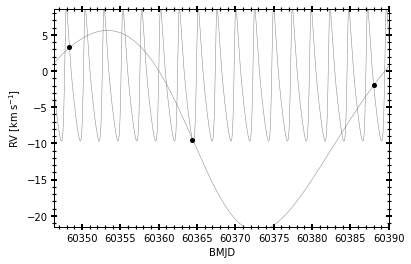

In [35]:
plot_tj(rv_df, 23 , 112, N=2)


In [ ]:
ss

In [ ]:

plot_one_star(113, 23,
              time = [60455.3159034499, 60473.357035030145, 60489.37269491982, 60506.086685420014, 60526.128989240155],
              rv = [14.5815151308206, 14.9710373837021, 15.4856280741578, 16.290014447224, 17.34191932688],
              N=2)#, ylim=(14,18)) 
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()


In [ ]:
plot_tj(rv_df, 23 , 113, N=2)


In [ ]:
ss

In [26]:
def clean_up0(df):
    galah_id = df.sobject_id.values[0]
    dtemp    = comb_df[(comb_df.GALAH_ID==galah_id)]

    time = dtemp['time'].to_numpy()
    rv   = dtemp['rv'].to_numpy()
    err  = dtemp['rv_err'].to_numpy()
    source  = dtemp['source'].to_numpy()
    
    
    return time, rv, err, source, dtemp


22 23 112
[3.32658485817988, -9.46735817160502, -1.86912108153358]
[60348.372994029894, 60364.38254112005, 60388.00479575014]
t_ref 60348.372994029894
P 2.453500041436296 d
e 0.42469417301302137
omega -1.090760272968166 rad
M0 -1.0668861592173682 rad
s 1.2177865377242671 km / s
K 9.213850373061401 km / s
v0 -2.2790196947645844 km / s


P 44.02382098730957 d
e 0.1119153061502177
omega -0.9145332767299043 rad
M0 2.130779971846035 rad
s 1.2262544559355262 km / s
K -13.862566902939578 km / s
v0 -7.302419654237557 km / s




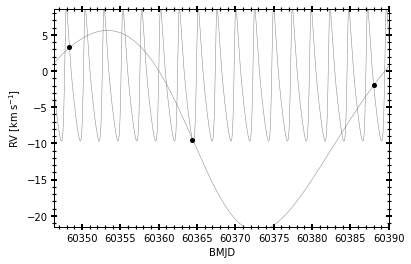

In [69]:
version = 1
def plot_tj(df, obj,program,N=100):
    ax=plt.subplot(111)
    dftemp  = df[(df.RG_id==obj) & (df.program==program)]
    time, rv, rv_err, source, dft = clean_up0(dftemp)

    idx = np.argsort(time)
    time, rv, rv_err, source = time[idx], rv[idx], rv_err[idx], source[idx]
    time, rv, rv_err, source = time[1:], rv[1:], rv_err[1:], source[1:]
    rv_err                = np.array(rv_err)
    rv_err[(rv_err<0.10)] = 0.10
    
    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    print(len(joker_samples),obj, program)
    data = Table()
    data['bjd']     = time
    data['rv']      = rv
    data['rv_err']  = rv_err
    data["rv"].unit = u.km / u.s
    data["rv_err"].unit = u.km / u.s
    
    t = Time(data["bjd"], format="jd", scale="tcb")
#     print(t)
    new_data = tj.RVData(
        t=t,
        rv=u.Quantity(data["rv"]),
        rv_err=u.Quantity(data["rv_err"]))
    print(list(new_data.rv.value))
    print(list(new_data.t.value))
    x = tj.plot_rv_curves(joker_samples[:N], data=new_data,ax=ax, add_labels=True)
#     print(x)
#     print(joker_samples)
    for n in range(N):
        sample = joker_samples[n]
        for param in ['P', 'e', 'omega', 'M0', 's', 'K', 'v0']:
            print(param,sample[param][0])
        print('\n')
        
#     print(joker_samples[:N][0]['v0'][0].value,joker_samples[:N][0]['e'][0].value,joker_samples[:N][0]['K'][0].value)
    
plot_tj(rv_df, 23 , 112, N=2)

